# Authors: 
         Rutvik Pansare       
         Praksha maheshwari
         Vishal Phaugat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

# connection with database
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="rutu12345",
  database="project"
)
# Query to extract data from the database
query = "SELECT * FROM project.crime_data;"
df = pd.read_sql(query,mydb)

mydb.close() #close the connection


df.head()

# convert date string to datetime format
from datetime import datetime
year_query = df.copy()
dates =[]
year_query['CMPLNT_FR_DT'] = pd.to_datetime(year_query['CMPLNT_FR_DT'])
year_query['YEAR'] = pd. DatetimeIndex(year_query['CMPLNT_FR_DT']).year

In [3]:
clean  = pd.read_csv("clean.csv")

In [19]:
clean['date'] =  year_query['CMPLNT_FR_DT']
clean['BORO_NM'] =  year_query['BORO_NM']
clean['CMPLNT_NUM'] =  year_query['CMPLNT_NUM']

In [20]:
linear = clean.copy()

In [21]:
linear.head()

,Unnamed: 0,CMPLNT_FR_DT,CMPLNT_FR_TM,SUSP_AGE_GROUP,Latitude,Longitude,YEAR,SUS_F,SUS_M,ASIAN / PACIFIC ISLANDER,...,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND,FELONY,MISDEMEANOR,VIOLATION,date,BORO_NM,CMPLNT_NUM
0,0,2,18,0,40.576238,-73.959504,2012,0,1,0,...,1,0,0,0,0,1,0,2012-02-08,BROOKLYN,100000228
1,1,1,0,2,40.858249,-73.902349,2016,0,1,0,...,0,0,0,0,0,1,0,2016-01-31,BRONX,100000272
2,2,1,17,0,40.804013,-73.878332,2010,0,1,0,...,0,0,0,0,0,1,0,2010-01-26,BRONX,100000480
3,3,11,20,2,40.675311,-73.966614,2017,0,1,0,...,1,0,0,0,0,1,0,2017-11-24,BROOKLYN,100000495
4,4,7,14,1,40.654621,-73.952894,2015,1,0,1,...,1,0,0,0,0,1,0,2015-07-12,BROOKLYN,100000926


In [22]:
vis1 = linear.groupby(["date",'BORO_NM']).sum().reset_index()

vis1.drop(["CMPLNT_FR_TM",'YEAR','SUSP_AGE_GROUP'],axis = 1,inplace = True)

vis2 = linear.groupby(["date",'BORO_NM'])['CMPLNT_NUM'].count().reset_index()

vis1['Total'] = vis2['CMPLNT_NUM']






In [23]:
# label encoding the target column- In this case, Boroughs are the target columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfle = vis1
dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.BORO_NM)
dfle

for i in ['BRONX','BROOKLYN','MANHATTAN','QUEENS','STATEN ISLAND']:
    new_column = []
    for j in dfle[i]:
        if j == 0.0:
            new_column.append(0)
        else:
            new_column.append(1)
    dfle[i]=new_column

<ipython-input-23-5882e1d968d0>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfle.SUSP_AGE_GROUP = le.fit_transform(dfle.BORO_NM)


In [24]:
#splitting the data into training data and test data
df = dfle.copy()
df = df.drop(['date','BORO_NM'],axis = 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Total',axis=1))
scaled_features = scaler.transform(df.drop('Total',axis=1))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Total'],
                                                    test_size=0.30)



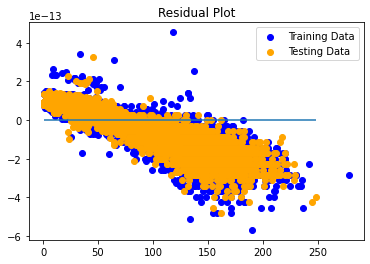

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()



In [28]:
#building the regression model
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

In [29]:
# Finding the mean square error
print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.129591267459086e-26, R2: 1.0
